# Analysis of distances between interacting digests

## Description of the analysis

In this notebook, we use the script [```diachrscripts/analyze_interaction_distances_script.py```](https://github.com/TheJacksonLaboratory/diachrscripts/blob/master/analyze_interaction_distances_script.py) in order to analyse the distances between interacting digests for simple, twisted, undirected and indefinable interactions. The distance between digests is defined as the distance between the inner ends of two cis interacting digests. Interactions with a distance of less than 10,000 bp are excluded from this analysis.

The categories simple, twisted, undirected and indefinable are defined using a binomial distribution. Let ```ks``` and ```kt``` the numbers of simple and twisted read pairs of a given interaction. An interaction is defined to be *simple*, if ```1 - binom.cdf(k = kt-1, n = ks + kt, p = 0.5) <= 0.05``` and ```ks < kt```. Otherwise, if ```1 - binom.cdf(k = ks-1, n = ks + kt, p = 0.5) <= 0.05``` and ```kt < ks``` the interaction is defined to be *twisted*. All remaining interactions are defined to be *undirected*, if ```4 < kt + ks```, or indefinable, if ```kt + ks < 5```.

This analysis can be restricted to particular subsets of interactions depending on the status of interacting digest using the ```STATUS_PAIR_FLAG```. The default is ```ALL```. ```AA```, for instance, can be used to restrict the analysis to interactions between digests that were selected for enrichment.

## Choose dataset

We analyzed four datasets, three capture Hi-C (Mifsud 2015, Schoenfelder 2015, Chesi 2019) and one Hi-C dataset (Nora 2017). In this section, individual datasets can be selected for the analysis that can be performed in the third section of this notebook.

### Mifsud 2015 (Promoter capture Hi-C, GM12878 and CD34+ blood cells, hg38, HindIII)

In [68]:
# Create output directory
!mkdir -p ../results/mifsud/digest_distance

#### Replicate 1

In [69]:
OUT_PREFIX = "../results/mifsud/digest_distance/digest_distance_analysis_mifsud_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R10.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2

In [74]:
OUT_PREFIX = "../results/mifsud/digest_distance/digest_distance_analysis_mifsud_r2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R20.interaction.counts.table.gt1.tsv.gz"

#### Replicate 3

In [47]:
OUT_PREFIX = "../results/mifsud/digest_distance/digest_distance_analysis_mifsud_r3"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R30.interaction.counts.table.gt1.tsv.gz"

### Schoenfelder 2015 (Promoter capture Hi-C, mES cells, mm10, HindIII)

In [80]:
# Create output directory
!mkdir -p ../results/schoenefelder/digest_distance

#### Replicate 1

In [81]:
OUT_PREFIX = "../results/schoenefelder/digest_distance/digest_distance_analysis_schoenefelder_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/schoenefelder_2015_mm10/data/gzdir/SCHOEN_R10.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2

In [87]:
OUT_PREFIX = "../results/schoenefelder/digest_distance/digest_distance_analysis_schoenefelder_r2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/schoenefelder_2015_mm10/data/gzdir/SCHOEN_R20.interaction.counts.table.gt1.tsv.gz"

### Chesi 2019 (Promoter Capture-C, BMP2 induced osteoblasts and HepG2 cells, hg38, DpnII)

In [93]:
# Create output directory
!mkdir -p ../results/chesi/digest_distance

#### Replicate 1 - BMP2

In [94]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_bmp2_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_bmp2/CHESI_BMP2_R10.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2 - BMP2

In [100]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_bmp2_r2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_bmp2/CHESI_BMP2_R20.interaction.counts.table.gt1.tsv.gz"

#### Replicate 3 - BMP2

In [113]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_bmp2_r3"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_bmp2/CHESI_BMP2_R30.interaction.counts.table.gt1.tsv.gz"

#### Replicate 1 - HEPG2

In [119]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_hepg2_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_hepg2/CHESI_HEPG2_R10.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2 - HEPG2

In [126]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_hepg2_r2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_hepg2/CHESI_HEPG2_R20.interaction.counts.table.gt1.tsv.gz"

#### Replicate 3 - HEPG2

In [132]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_hepg2_r3"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_hepg2/CHESI_HEPG2_R30.interaction.counts.table.gt1.tsv.gz"

### Nora 2017 (gone boundary bins)

In [138]:
# Create output directory
!mkdir -p ../results/nora/digest_distance

#### Replicate 1 - before CTCF-depletion

In [141]:
OUT_PREFIX = "../results/nora/digest_distance/digest_distance_analysis_nora_GSM2644945"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644945_bins.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2 - before CTCF-depletion

In [147]:
OUT_PREFIX = "../results/nora/digest_distance/digest_distance_analysis_nora_GSM2644946"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644946_bins.interaction.counts.table.gt1.tsv.gz"

#### Replicate 1 - after CTCF-depletion

In [153]:
OUT_PREFIX = "../results/nora/digest_distance/digest_distance_analysis_nora_GSM2644947"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644947_bins.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2 - after CTCF-depletion

In [159]:
OUT_PREFIX = "../results/nora/digest_distance/digest_distance_analysis_nora_GSM2644948"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644948_bins.interaction.counts.table.gt1.tsv.gz"

## Perform analysis

In [160]:
# Run Python script
!python ../analyze_interaction_distances_script.py --out-prefix $OUT_PREFIX --status-pair-flag $STATUS_PAIR_FLAG --interaction-file $INTERACTION_FILE

[INFO] Input parameters
	[INFO] Analysis for: ../results/nora/digest_distance/digest_distance_analysis_nora_GSM2644948
	[INFO] Interaction file: ../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644948_bins.interaction.counts.table.gt1.tsv.gz
	[INFO] Status pair flag: ALL
[INFO] Determining distances between digest pairs in ../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644948_bins.interaction.counts.table.gt1.tsv.gz ...
	[INFO] 0 interactions processed ...
	[INFO] 1000000 interactions processed ...
	[INFO] 2000000 interactions processed ...
	[INFO] 3000000 interactions processed ...
[INFO] Summary statistics
	[INFO] Number of non ALL interactions: 0 (discarded)
	[INFO] Number of trans and short range interactions: 221050 (discarded)
	[INFO] Number of simple interactions: 20379
	[INFO] Number of twisted interactions: 20662
	[INFO] Number of undirected interactions: 826700
	[INFO] Number of indefinable interactions: 2707494
[INFO] Writing numpy arrays with distances to di

In [4]:
# Load modules
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [161]:
# Load saved numpy arrays from disk
array_path = OUT_PREFIX + "_distance_array_simple.npy"
distance_array_simple = np.load(array_path)
array_path = OUT_PREFIX + "_distance_array_twisted.npy"
distance_array_twisted = np.load(array_path)
array_path = OUT_PREFIX + "_distance_array_undirected.npy"
distance_array_undirected = np.load(array_path)
array_path = OUT_PREFIX + "_distance_array_indefinable.npy"
distance_array_indefinable = np.load(array_path)

# Determine mean distances
print("Mean distances:")
print("\tSimple: " + str(int(distance_array_simple.mean())))
print("\tTwisted: " + str(int(distance_array_twisted.mean())))
print("\tUndirected: " + str(int(distance_array_undirected.mean())))
print("\tIndefinable: " + str(int(distance_array_indefinable.mean())))

# Determine median distances
print("Median distances:")
print("\tSimple: " + str(int(np.median(distance_array_simple))))
print("\tTwisted: " + str(int(np.median(distance_array_twisted))))
print("\tUndirected: " + str(int(np.median(distance_array_undirected))))
print("\tIndefinable: " + str(int(np.median(distance_array_indefinable))))

# Perform t-tests
print(" t-tests:")

res = stats.ttest_ind(distance_array_simple, distance_array_twisted)
print("\tSimple vs. Twisted: " + str(res))

res = stats.ttest_ind(distance_array_simple, distance_array_undirected)
print("\tSimple vs. Undirected: " + str(res))

res = stats.ttest_ind(distance_array_simple, distance_array_indefinable)
print("\tSimple vs. Indefinable: " + str(res))

res = stats.ttest_ind(distance_array_twisted, distance_array_undirected)
print("\tTwisted vs. Undirected: " + str(res))

res = stats.ttest_ind(distance_array_twisted, distance_array_indefinable)
print("\tTwisted vs. Indefinable: " + str(res))

res = stats.ttest_ind(distance_array_undirected, distance_array_indefinable)
print("\tUndirected vs. Indefinable: " + str(res))


Mean distances:
	Simple: 227133
	Twisted: 233726
	Undirected: 230428
	Indefinable: 2097511
Median distances:
	Simple: 160001
	Twisted: 140001
	Undirected: 160001
	Indefinable: 640001
 t-tests:
	Simple vs. Twisted: Ttest_indResult(statistic=-1.0315895019550123, pvalue=0.3022705396514445)
	Simple vs. Undirected: Ttest_indResult(statistic=-0.7964225527567259, pvalue=0.42578669726981333)
	Simple vs. Indefinable: Ttest_indResult(statistic=-38.851892409226565, pvalue=0.0)
	Twisted vs. Undirected: Ttest_indResult(statistic=0.7853370285165611, pvalue=0.43225621057651653)
	Twisted vs. Indefinable: Ttest_indResult(statistic=-38.980866705424624, pvalue=0.0)
	Undirected vs. Indefinable: Ttest_indResult(statistic=-246.74435311192488, pvalue=0.0)


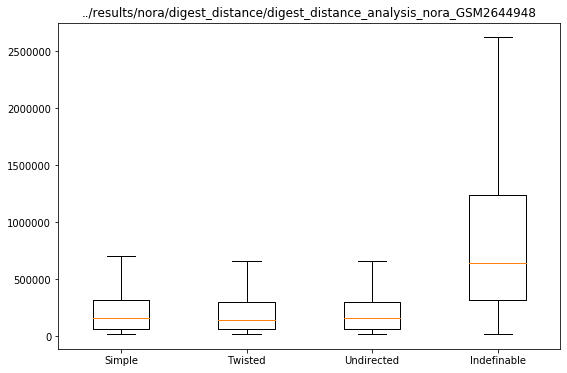

In [162]:
# Create boxplot for simple, twisted, undirected and indefinable

# Combine arrays into a list    
data_to_plot = [distance_array_simple, distance_array_twisted, distance_array_undirected, distance_array_indefinable]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False)
plt.xticks([1, 2, 3, 4], ['Simple', 'Twisted', 'Undirected', 'Indefinable'])

plt.title(OUT_PREFIX)

# Save the figure
plt.title(OUT_PREFIX)
figure_name = OUT_PREFIX + "_boxplot_1.pdf"
fig.savefig(figure_name, bbox_inches='tight', format = "pdf")


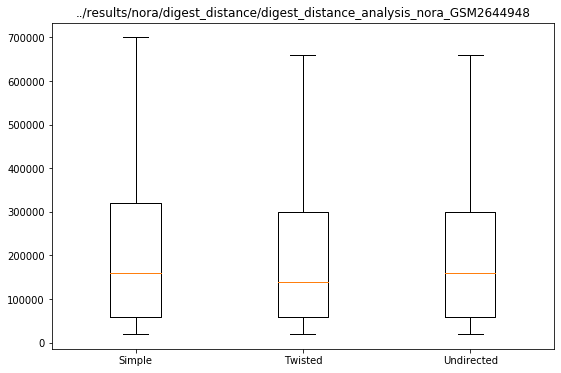

In [163]:
# Create boxplot for simple, twisted, undirected only

# Combine these different collections into a list    
data_to_plot = [distance_array_simple, distance_array_twisted, distance_array_undirected]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False)
plt.xticks([1, 2, 3], ['Simple', 'Twisted', 'Undirected'])

# Save the figure
plt.title(OUT_PREFIX)
figure_name = OUT_PREFIX + "_boxplot_2.pdf"
fig.savefig(figure_name, bbox_inches='tight', format = "pdf")

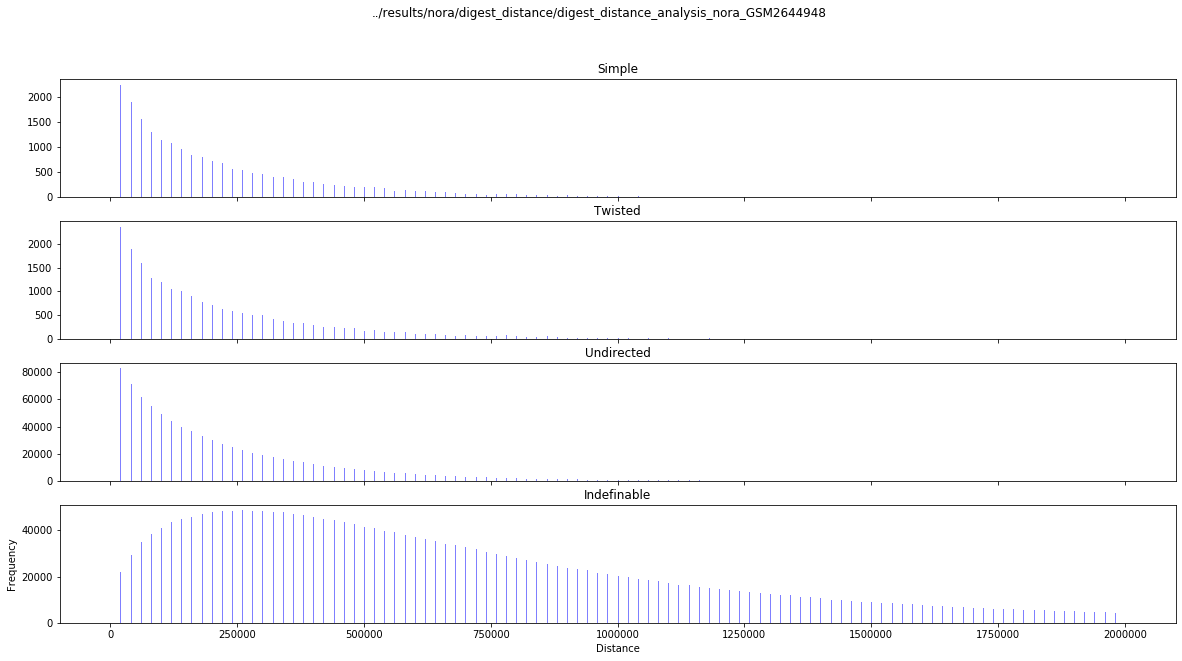

In [164]:
# Create distance histograms
plt.rcParams['figure.figsize'] = [20, 10]
num_bins = 1000
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=False)
f.canvas.set_window_title('Distances between interacting digests')
plt.title(OUT_PREFIX)
plt.xlabel("Distance")
plt.ylabel("Frequency")

ax1.set_title("Simple")
n, bins, patches = ax1.hist(distance_array_simple, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

ax2.set_title("Twisted")
n, bins, patches = ax2.hist(distance_array_twisted, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

ax3.set_title("Undirected")
n, bins, patches = ax3.hist(distance_array_undirected, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

ax4.set_title("Indefinable")
n, bins, patches = ax4.hist(distance_array_indefinable, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

# Save the figure
f.suptitle(OUT_PREFIX)
figure_name = OUT_PREFIX + "_histogram.pdf"
f.savefig(figure_name, bbox_inches='tight', format = "pdf")